In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Column specification for the fixed-width format (fwf)
ColSpecs = [(0,32),(32,41)] 

df18 = pd.read_fwf("./data/2018-results.txt",colspecs=ColSpecs,Header=1, skiprows=(1,1))
df19 = pd.read_fwf("./data/2019-results.txt",colspecs=ColSpecs,Header=1, skiprows=(1,1))
df = pd.merge(df18, df19, on="Tag")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5090 entries, 0 to 5089
Data columns (total 3 columns):
Tag         5086 non-null object
Rank2018    5090 non-null int64
Rank2019    5090 non-null int64
dtypes: int64(2), object(1)
memory usage: 159.1+ KB


,Tag,Rank2018,Rank2019
0,javascript,1,2
1,python,2,1
2,java,3,3
3,android,4,5
4,c#,5,4


In [2]:
 # This row is an outlier which screws up our plot
df[df["Tag"] == "excel-vba"]  

,Tag,Rank2018,Rank2019
50,excel-vba,51,1650


In [3]:
# We drop it.
df = df[df["Tag"] != "excel-vba"]  
df[df["Tag"] == "excel-vba"]

,Tag,Rank2018,Rank2019


In [4]:
# Sort the dataset by 2018 rank
df.sort_values(by=['Rank2018'], ascending=True, inplace=True)
df.head(20)

,Tag,Rank2018,Rank2019
0,javascript,1,2
1,python,2,1
2,java,3,3
3,android,4,5
4,c#,5,4
5,php,6,6
6,html,7,7
7,angular,8,11
8,jquery,9,16
9,css,10,13


In [5]:
def show(TAGS):
    df2 = df.head(TAGS)
    x = list(df2["Rank2018"])
    y = list(df2["Rank2019"])
    z = list(df2["Tag"])

    fig, ax = plt.subplots(figsize = (15,15))

    # plot the tags as small circles (unfilled with edge)
    #ax.scatter(x, y, s=100, marker="o", facecolors='k', edgecolors='k')

    # plot a diagonal line along the lower left and upper right
    MAX = max([max(x), max(y)])
    ax.plot((0,TAGS),(0,TAGS),'black',linestyle='--',marker='') 

    ax.set_xlabel("2018 Rank")
    ax.set_ylabel("2019 Rank")

    ax.set_xlim(0, TAGS)
    #ax.set_ylim(0, TAGS)
    ax.set_ylim(0, MAX)
    ax.set_aspect("equal")
    red_patch = mpatches.Patch(color='red', label='2019 rank is worse than 2018')
    black_patch = mpatches.Patch(color='black', label='2019 rank is the same as 2018')
    green_patch = mpatches.Patch(color='green', label='2019 rank is better than 2018')
    ax.legend(handles=[red_patch, black_patch, green_patch],loc='upper left')

    for i in range(len(x)):
        if x[i] == y[i]:
            clr = "k"   # black, no change in rank
        elif x[i] > y[i]:
            clr = "g"   # green, ranked higher
        else:
            clr = "r"   # red, ranked lower
        ax.annotate("O " + z[i] + "(" + str(x[i]) + ", " + str(y[i]) + ")", (x[i], y[i]), fontsize=20, color=clr)

#    os.remove("./result.png")
    plt.savefig("result.png")

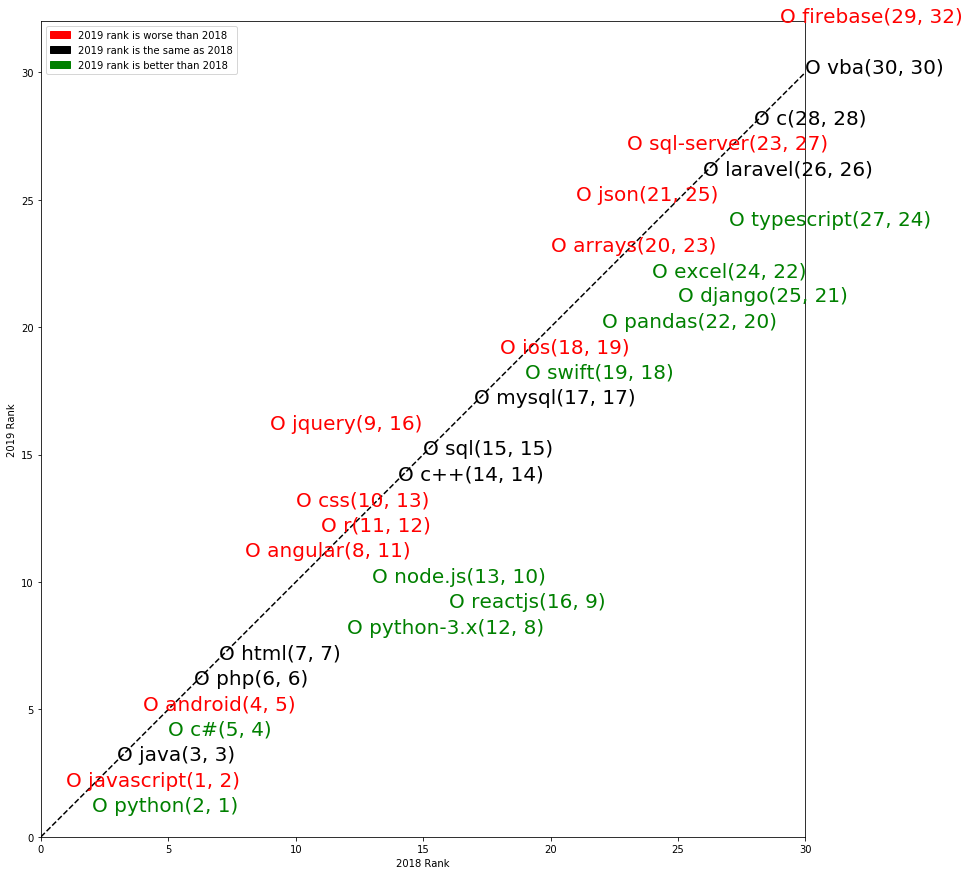

In [7]:
# choose between 5 and 500 with increament 5
@interact
def get_tag_count(TAGS=(5, 60, 5)):  
    return show(TAGS)
#TAGS = 100     # Plot the top ranked tags

In [7]:
df["Diff"] = df["Rank2018"] - df["Rank2019"]
df["Diff"] = abs(df["Diff"])
df.sort_values(by = ["Diff"], ascending=False).head(200)

,Tag,Rank2018,Rank2019,Diff
1024,javascript-events,1024,4905,3881
1119,xcode9,1119,4767,3648
3563,react-hooks,3573,331,3242
1073,ios11,1073,4293,3220
4441,android-listview,4466,1302,3164
1779,jest,1780,4746,2966
3368,google-sheets-formula,3379,438,2941
1904,laravel-5.3,1901,4654,2753
4249,regex-greedy,4248,1568,2680
1851,angular2-services,1853,4336,2483


In [8]:
print(os.listdir("./"))


['result.png', '__output__.json', '__notebook__.ipynb']
